0.7454689973608776
0.8552617622617449


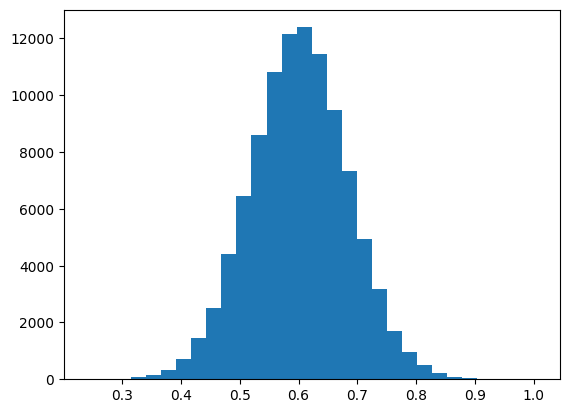

0.08251205082909921


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Example on p. 188 of ISLR:
n = 100

# Simulate the two financial assets x and y:
x = np.random.normal(size=n)
y = 0.5 * x + np.random.normal(size=n)

# Var(x) = 1, Var(y) = 1.25, cov(x, y) = 0.5
# Check:
var_x = np.var(x)
print(var_x)
var_y = np.var(y)
print(var_y)
cov_xy = np.cov(x, y)[0, 1]

# Alpha function from lecture slides:
def alpha(x, y):
    var_x = np.var(x)
    var_y = np.var(y)
    cov_xy = np.cov(x, y)[0, 1]
    return (var_y - cov_xy) / (var_x + var_y - 2 * cov_xy)

alpha_value = alpha(x, y)
# Note the true theoretical alpha = (1.25 - 0.5)/(1 + 1.25 - 2*0.5) = 0.6

# What is the SE of alpha?
# No theory exists about it!

# Simulate many alphas from the true population:
R = 100000
out = np.zeros(R)

for i in range(R):
    x = np.random.normal(size=n)
    y = 0.5 * x + np.random.normal(size=n)
    out[i] = alpha(x, y)

plt.hist(out, bins=30)
plt.show()
mean_out = np.mean(out)
sd_out = np.std(out)
print(sd_out)

# Estimated SD of alpha is about 0.08
# Again, there is no theoretical result to compare to!

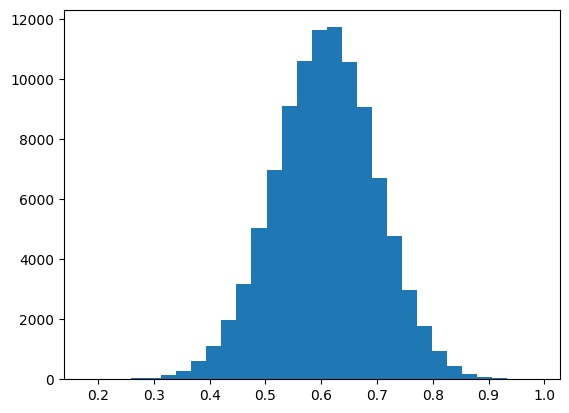

0.09099017317419444


In [10]:
# Let us now do the same with bootstrap:
# We have only one sample to work with!!
# Generate that sample:

np.random.seed(265)
x = np.random.normal(size=n)
y = 0.5 * x + np.random.normal(size=n)

# Generate the bootstrap samples:
# We will use the sample function to resample (x,y)
b_ind = np.random.choice(range(n), size=n, replace=True)
out_boot = np.zeros(R)

for i in range(R):
    b_ind = np.random.choice(range(n), size=n, replace=True)
    out_boot[i] = (np.var(y[b_ind]) - np.cov(x[b_ind], y[b_ind])[0, 1]) / (np.var(x[b_ind]) + np.var(y[b_ind]) - 2 * np.cov(x[b_ind], y[b_ind])[0, 1])

plt.hist(out_boot, bins=30)
plt.show()
mean_boot = np.mean(out_boot)
sd_boot = np.std(out_boot)
print(sd_boot)
# Quite close to the values obtained with simulating from the population!

In [12]:
# All this can be done automatically with library bootstrap:
# Define function to estimate alpha

# To be finished later